# Projeto Final


Exercício para os alunos do curso Degree de Data Science módulo IV - Técnicas de Programação I da Let's Code.

Professor: [Pedro Gengo](https://github.com/pedrogengo)

**Colegas participantes do grupo para o projeto**:

* [Daniel Aquino](https://github.com/DanWolks)

* [Jeremias Diefenthaler](https://github.com/JeremiasDief)

## Instruções


Você fazem parte do time de Data Science e Analytics da Popolishoshop e receberam uma base de dados contendo as infromações sobre a última Black Friday que ocorreu. O time de negócio solicitou para vocês um relatório, onde especificaram algumas informações e também um estudo para que vocês respondessem utilizando as bases fornecidas.

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/sdolezel/black-friday), que reúne dados sobre transações de compras em uma loja de varejo. Esse dataset está quebrado em diferentes arquivos e é sua função entender como cada um se relaciona com o outro.

Vamos utilizá-lo para praticar a exploração utilizando pandas.

Na tabela a seguir podemos ver os nomes das colunas e as descrições dos campos.

| Coluna                 | Descrição                                                 |
|------------------------|-----------------------------------------------------------|
| User_ID                | ID do usuário                                             |
| Product_ID             | ID do produto                                             |
| Gender                 | Sexo do usuário                                           |
| Age                    | Ano em intervalos                                         |
| Occupation             | Ocupação (mascarada)                                      |
| City_Category          | Categoria da cidade (A, B, C)                             |
| StayInCurrentCityYears | Número de anos de permanência na cidade atual             |
| Marital_Status         | Estado civil                                              |
| ProductCategory1       | Categoria do produto (Mascarada)                          |
| ProductCategory2       | Categoria que o produto pode pertencer também (Mascarada) |
| ProductCategory3       | Categoria que o produto pode pertencer também (Mascarada) |
| Purchase               | Valor da compra                                           | 

Todo o código desenvolvido deve ser pensado para ser reutilizado. A avaliação se dará executando todo o notebook com outra tabela, de mesmas colunas. Sendo assim, pensem na qualidade e reprodução do código.

In [1]:
#Importando as bibliotecas necessárias

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.patches as mpatches

from pandas_profiling import ProfileReport

In [2]:
%matplotlib inline

## _Set up_ da análise

Faça a leitura das três bases fornecidas e junte-as em um único DataFrame.

In [3]:
# Esse arquivo tem um delimitador diferente, por isso foi preciso especificá-lo para leitura.

df_perfil_usuario = pd.read_csv("user_profile.csv", delimiter="|")
df_perfil_usuario.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
1,1000002,M,55+,16,C,4+,0
2,1000003,M,26-35,15,A,3,0
3,1000004,M,46-50,7,B,2,1
4,1000005,M,26-35,20,A,1,1


In [4]:
df_compra = pd.read_csv("purchase.csv")
df_compra.head()

,User_ID,Product_ID,Purchase
0,1000001,P00069042,8370
1,1000001,P00248942,15200
2,1000001,P00087842,1422
3,1000001,P00085442,1057
4,1000002,P00285442,7969


In [5]:
# Esse arquivo tem um delimitador diferente, por isso foi preciso especificá-lo para leitura.

df_info_prod = pd.read_csv("product_info.csv", delimiter=";")
df_info_prod

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,3,NaN,NaN
1,P00248942,1,6.0,14.0
2,P00087842,12,NaN,NaN
3,P00085442,12,14.0,NaN
4,P00285442,8,NaN,NaN
...,...,...,...,...
3618,P00065942,8,NaN,NaN
3619,P00329042,8,NaN,NaN
3620,P00038842,7,NaN,NaN
3621,P00295642,2,NaN,NaN


In [6]:
# Criando um único dataset com os dados dos outros 3.
# Como as informações do arquivo "Purchase" são importantes, foi configurado como "left".

df_vendas_bf = pd.merge(df_compra, df_perfil_usuario, on="User_ID", how="outer")
df_vendas_bf = pd.merge(df_vendas_bf, df_info_prod, on="Product_ID", how="outer")
df_vendas_bf

,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,M,18-25,4,A,4+,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1005754,P00234942,7120,F,18-25,1,A,2,0,5,NaN,NaN
537573,1005948,P00126342,9875,M,55+,13,B,0,0,8,NaN,NaN
537574,1006001,P00013442,2277,F,26-35,7,A,0,1,8,NaN,NaN
537575,1002315,P00063442,1866,M,55+,7,C,4+,1,5,NaN,NaN


In [7]:
df_vendas_bf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Purchase                    537577 non-null  int64  
 3   Gender                      537577 non-null  object 
 4   Age                         537577 non-null  object 
 5   Occupation                  537577 non-null  int64  
 6   City_Category               537577 non-null  object 
 7   Stay_In_Current_City_Years  537577 non-null  object 
 8   Marital_Status              537577 non-null  int64  
 9   Product_Category_1          537577 non-null  int64  
 10  Product_Category_2          370591 non-null  float64
 11  Product_Category_3          164278 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 53.3+ MB


### Gerando um relatório utilizando a biblioteca Pandas Profiling para ter uma análise de alguns dados.

In [ ]:
# Usando a biblioteca Profiling Pandas para gerar relatórios

perfil = ProfileReport(df_vendas_bf, title="Analisando as Compras da Black Friday", 
                        html={"style": {"full_width": True}})

In [ ]:
#Para poder visualizar o relatório criado no Jupyter
perfil.to_notebook_iframe()

In [ ]:
#Salvando o relatório em um arquivo

perfil.to_file("relatorio_vendas_blackfriday.html")

## Questão 1

Quantas observações e quantas colunas há no dataset completo (todas as bases juntas)? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [8]:
# Utilizando "shape" no dataframe completo para apresentar a quantidade de linhas e colunas

df_vendas_bf.shape

(537577, 12)

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [9]:
# Criando uma cópia do dataframe completo
df_age_fem_26a35 = df_vendas_bf.copy()

# Verificando se existem usuários duplicados, o que pode imapctar na quantidade de mulheres entre 26 e 35 anos
print(df_age_fem_26a35["User_ID"].duplicated().sum())

# Verificando quantos usuários únicos existem, pois há dados duplicados na coluna "User_ID"
print(df_age_fem_26a35["User_ID"].nunique())

531686
5891


In [10]:
# Eliminando os dados duplicados da coluna "User_ID", para podermos ter a real quantidade de mulheres entre 26 e 35 anos

df_age_fem_26a35.drop_duplicates(subset=["User_ID"], inplace=True)
df_age_fem_26a35

,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,M,18-25,4,A,4+,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
179643,1000821,P00195542,9644,M,18-25,2,C,2,0,2,12.0,NaN
211208,1005043,P00230442,18811,F,18-25,6,C,2,0,14,NaN,NaN
212738,1004331,P00128942,7959,M,36-45,6,B,3,0,1,11.0,NaN
220977,1002908,P00250642,7630,M,18-25,2,C,3,0,11,NaN,NaN


In [11]:
# Essa é a função para agrupar as informações enquanto conta os valores para verificar grupos de idade e gênero

df_age_fem_26a35.groupby(['Gender'])["Age"].value_counts()

Gender  Age  
F       26-35     545
        36-45     333
        18-25     287
        46-50     182
        51-55     142
        55+        99
        0-17       78
M       26-35    1508
        36-45     834
        18-25     782
        46-50     349
        51-55     339
        55+       273
        0-17      140
Name: Age, dtype: int64

In [12]:
'''
    Depois de encontrar qual a posição do grupo de faixa etária desejada, o índice foi utilizado para 
    apresentar somente aquela informação específica
''' 
df_age_fem_26a35.groupby(['Gender'])["Age"].value_counts()[0]

545

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [13]:
# Essa função retorna o número de usuários únicos na coluna "User_ID".

df_vendas_bf["User_ID"].nunique()

5891

## Questão 4

Qual porcentagem dos registros (percentual de linhas) possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [14]:
# Apresentando a porcentagem de dados nulos por coluna

(df_vendas_bf.isnull().sum() / (df_vendas_bf.isnull().sum() + df_vendas_bf.notnull().sum()))

User_ID                       0.000000
Product_ID                    0.000000
Purchase                      0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
dtype: float64

In [15]:
# Criando uma cópia do dataframe original
df_na_dropadas = df_vendas_bf.copy()

linhas_na_dropadas = df_na_dropadas.dropna().shape[0] # Remove as linhas que possuem pelo menos 1 valor null
print(f"Total de linhas completas (sem nenhum dado null) do DataFrame: {linhas_na_dropadas}")

# Utilizando a porcentagem invertida de linhas completas, temos a % de linhas com pelo menos um valor null
porcent_linhas_null = 1 - (linhas_na_dropadas / df_vendas_bf.shape[0])

# Apresentando um único escalar, arredondando para 7 depois da vírgula, a % de linhas com pelo menos um valor null
round(porcent_linhas_null, 7)

Total de linhas completas (sem nenhum dado null) do DataFrame: 164278


0.6944103

## Questão 5

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [16]:
# Apresentando os números de dados para nulls na coluna "Product_Category_3", que tem a maior quantidade de nulls

df_vendas_bf["Product_Category_3"].isnull().sum()

373299

## Questão 6

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [17]:
# Aqui foi mapeado quantas vezes cada valor apareceu usando "value counts"

df_vendas_bf["Product_Category_3"].value_counts()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: Product_Category_3, dtype: int64

In [18]:
#Depois de encontrar quantas vezes cada número apareceu, usando "idmax" foi possível trazer o valor mais frequente 

df_vendas_bf["Product_Category_3"].value_counts().idxmax()

16.0

## Questão 7

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [19]:
# Criando um novo dataframe somente com as linhas em que "Product_Category_2" tem valor null 

df_catg2_nula = df_vendas_bf[df_vendas_bf["Product_Category_2"].isnull()]
df_catg2_nula

,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,M,18-25,4,A,4+,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537571,1005717,P00206942,15224,M,26-35,0,B,3,1,1,NaN,NaN
537572,1005754,P00234942,7120,F,18-25,1,A,2,0,5,NaN,NaN
537573,1005948,P00126342,9875,M,55+,13,B,0,0,8,NaN,NaN
537574,1006001,P00013442,2277,F,26-35,7,A,0,1,8,NaN,NaN


In [20]:
# Criando um novo dataframe somente com as linhas em que "Product_Category_3" tem valor null 

df_categ3_nula = df_vendas_bf[df_vendas_bf["Product_Category_3"].isnull()]
df_categ3_nula

,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,M,18-25,4,A,4+,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1005754,P00234942,7120,F,18-25,1,A,2,0,5,NaN,NaN
537573,1005948,P00126342,9875,M,55+,13,B,0,0,8,NaN,NaN
537574,1006001,P00013442,2277,F,26-35,7,A,0,1,8,NaN,NaN
537575,1002315,P00063442,1866,M,55+,7,C,4+,1,5,NaN,NaN


In [21]:
'''
    Comparando a quantidade de dados null da coluna "Product_Category_3", do DataFrame "df_category2_isnull",
    com o números de linhas totais deste mesmo DataFrame;
    Desta forma, conseguimos analisar que quando o valor na coluna "Product_Category_2" é null ele também será
    null na coluna "Product_Category_3"
    
''' 


df_catg2_nula["Product_Category_3"].isnull().sum() == df_catg2_nula.shape[0]

True

## Questão 8

Qual o ID do usuário que mais gastou na Black Friday?

In [22]:
# Somando o Total de Compra para o "User_ID" para identificar quanto cada usuário realmente gastou

df_vendas_bf.groupby(["User_ID"])["Purchase"].sum().sort_values(ascending=False)

User_ID
1004277    10536783
1001680     8699232
1002909     7577505
1001941     6817493
1000424     6573609
             ...   
1004464       46091
1005944       46070
1005012       45551
1005117       44432
1004991       44108
Name: Purchase, Length: 5891, dtype: int64

In [23]:
'''
    Depois de encontrar o total de compras por "User_ID", usando "idmax" é possível trazer o ID 
    do usuário que mais gastou.
'''

gastador = df_vendas_bf.groupby(["User_ID"])["Purchase"].sum().idxmax()
gastador

1004277

## Questão 9

Qual grupo (homens ou mulheres) mais gastou na Black Friday?

In [24]:
# Contando a quantidade de homens e mulheres. Aqui não excluímos os dados repetidos da coluna "User_ID"
# pois um mesmo usuário masculino ou feminino pode ter feito mais de uma compra, impactando no valor total gasto

df_vendas_bf["Gender"].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [25]:
# Valor máximo gasto por gênero

df_vendas_bf.groupby(by=["Gender"])[["Purchase"]].max()

,Purchase
Gender,
F,23959
M,23961


In [26]:
    ''' 
    Agrupando a coluna "Gênero" ("Gender") é possível obter o valor média gasto por gênero,
    bem como determinar que os "Homens", em média, gastaram levente a mais durante a Black Friday.
    
    Importante frisar que a média é uma solução estatística mais coerente do que simplesmente
    somar o valor total gasto por gênero. A soma pode mascarar que apenas um usuário, por exemplo,
    esteja gastando um valor muito fora da curva e que possa distorcer a conclusão final desta resposta.
    '''

df_vendas_bf.groupby(by=["Gender"])[["Purchase"]].mean()

,Purchase
Gender,
F,8809.761349
M,9504.771713


## Questão 10

Faça uma nova tabela com a categoria mais comprada por cada cliente.

Obs: se ele comprou um produto que possuir valores nas três colunas de categorias, então deve-se considerar todas as categorias.

In [27]:
# Criando uma cópia do dataframe original

df_por_categoria = df_vendas_bf.copy()

In [28]:
'''
     Aplicando a função "melt" no dataframe completo, tendo a coluna "Users_ID" como variáveis
     e as colunas "Product_Category_1", "Product_Category_2" e "Product_Category_3" foram setadas como valores
'''

    
df_por_categoria = pd.melt(df_por_categoria[["User_ID", "Product_Category_1", "Product_Category_2", "Product_Category_3"]], id_vars=["User_ID"], value_name="Opcoes_Categoria")
df_por_categoria

,User_ID,variable,Opcoes_Categoria
0,1000001,Product_Category_1,3.0
1,1000017,Product_Category_1,3.0
2,1000023,Product_Category_1,3.0
3,1000030,Product_Category_1,3.0
4,1000073,Product_Category_1,3.0
...,...,...,...
1612726,1005754,Product_Category_3,NaN
1612727,1005948,Product_Category_3,NaN
1612728,1006001,Product_Category_3,NaN
1612729,1002315,Product_Category_3,NaN


**OBS**: Neste exercício, a partir deste ponto, a solução foi trazida pelo colega [Daniel Watanabe](https://github.com/Daniel-Wata), que está no grupo Kung Fu Pandas.

Anteriormente, havíamos utilizado "value_counts()".

In [29]:
# Agrupando o último dataframe pelas "User_ID" e "Opcoes_Categoria", contando cada opção.

df_agrup_op_categ = df_por_categoria.groupby(["User_ID", "Opcoes_Categoria"]).count()
df_agrup_op_categ = df_agrup_op_categ.reset_index()
df_agrup_op_categ

,User_ID,Opcoes_Categoria,variable
0,1000001,1.0,4
1,1000001,2.0,3
2,1000001,3.0,11
3,1000001,4.0,13
4,1000001,5.0,5
...,...,...,...
82918,1006040,14.0,24
82919,1006040,15.0,19
82920,1006040,16.0,19
82921,1006040,17.0,9


In [30]:
#Pivot table para obter a quantidade de produtos comprados por opção de categoria para casa usuário

df_pv_usuari_opcao_cat = df_agrup_op_categ.pivot_table("variable", index="User_ID", 
                                                                                    columns="Opcoes_Categoria", 
                                                                                    aggfunc=np.sum).fillna(0)
df_pv_usuari_opcao_cat

Opcoes_Categoria,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
User_ID,,,,,,,,,,,,,,,,,,
1000001,4.0,3.0,11.0,13.0,5.0,2.0,0.0,13.0,2.0,0.0,0.0,8.0,0.0,3.0,1.0,2.0,2.0,0.0
1000002,31.0,9.0,0.0,0.0,15.0,9.0,0.0,46.0,1.0,1.0,2.0,0.0,3.0,10.0,7.0,14.0,7.0,1.0
1000003,15.0,15.0,1.0,1.0,15.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,2.0,0.0,4.0
1000004,13.0,4.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0,3.0,1.0,0.0
1000005,18.0,5.0,2.0,4.0,26.0,9.0,5.0,57.0,0.0,1.0,5.0,2.0,4.0,13.0,6.0,21.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,81.0,41.0,14.0,26.0,140.0,34.0,7.0,209.0,8.0,11.0,39.0,9.0,16.0,73.0,79.0,65.0,15.0,6.0
1006037,14.0,5.0,0.0,2.0,25.0,12.0,0.0,61.0,4.0,4.0,4.0,1.0,8.0,16.0,14.0,38.0,9.0,1.0
1006038,0.0,0.0,2.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0


In [31]:
    '''
    Inclusão de uma nova coluna chamada "Max" no final do dataframe
    que trará quais produtos na opção de categoria foram mais comprados por cada usuário
    '''

df_pv_usuari_opcao_cat["Max"] = df_pv_usuari_opcao_cat.idxmax(axis=1)
df_pv_usuari_opcao_cat

Opcoes_Categoria,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Max
User_ID,,,,,,,,,,,,,,,,,,,
1000001,4.0,3.0,11.0,13.0,5.0,2.0,0.0,13.0,2.0,0.0,0.0,8.0,0.0,3.0,1.0,2.0,2.0,0.0,4.0
1000002,31.0,9.0,0.0,0.0,15.0,9.0,0.0,46.0,1.0,1.0,2.0,0.0,3.0,10.0,7.0,14.0,7.0,1.0,8.0
1000003,15.0,15.0,1.0,1.0,15.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,2.0,0.0,4.0,1.0
1000004,13.0,4.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0,3.0,1.0,0.0,1.0
1000005,18.0,5.0,2.0,4.0,26.0,9.0,5.0,57.0,0.0,1.0,5.0,2.0,4.0,13.0,6.0,21.0,2.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,81.0,41.0,14.0,26.0,140.0,34.0,7.0,209.0,8.0,11.0,39.0,9.0,16.0,73.0,79.0,65.0,15.0,6.0,8.0
1006037,14.0,5.0,0.0,2.0,25.0,12.0,0.0,61.0,4.0,4.0,4.0,1.0,8.0,16.0,14.0,38.0,9.0,1.0,8.0
1006038,0.0,0.0,2.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,5.0


## Questão 11

Normalize a coluna Purchase. A fórmula de normalização é:


$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

In [32]:
# Criando uma cópia do dataframe original
df_compra_normalizada = df_vendas_bf.copy()

In [33]:
    '''
     Variável "compra_normalizada" criada usando a formula de normalização
     para normalizar os dados da coluna "Compra" ("Purchase")
    '''

compra_normalizada = (df_compra_normalizada["Purchase"] - df_compra_normalizada["Purchase"].min()) / (df_compra_normalizada["Purchase"].max() - df_compra_normalizada["Purchase"].min())

# Inclusão de uma nova coluna chamada "Compra_Normalizada" na cópia do dataframe original

df_compra_normalizada.insert(3, "Compra_Normalizada", compra_normalizada)
df_compra_normalizada

,User_ID,Product_ID,Purchase,Compra_Normalizada,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,0.344255,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,0.563846,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,0.455796,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,0.330207,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,0.450034,M,18-25,4,A,4+,0,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1005754,P00234942,7120,0.291681,F,18-25,1,A,2,0,5,NaN,NaN
537573,1005948,P00126342,9875,0.407554,M,55+,13,B,0,0,8,NaN,NaN
537574,1006001,P00013442,2277,0.087988,F,26-35,7,A,0,1,8,NaN,NaN
537575,1002315,P00063442,1866,0.070702,M,55+,7,C,4+,1,5,NaN,NaN


## Questão 12
O estado civil influencia no valor gasto e na categoria de produto comprada? Mostre!

Se eu quisesse vender mais produtos da categoria 14, deveria investir em propagandas para qual estado civil?

#### **Para essa análise, foi definido que "0" representa os clientes solteiros enquanto "1" representa os clientes casados**.

In [34]:
# Criando uma cópia do dataframe original

df_estado_civil = df_vendas_bf.copy()

In [35]:
# Verificando os valores de "Estado Civil" ("Marital_Status")

df_estado_civil["Marital_Status"].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [36]:
'''
    Agrupando por "Estado Civil" ("Marital_Status"), filtando pela média gasta por "Compra" ("Purchase") 
    para determinar qual estado civil mais gasta 
'''

df_estd_civil_compr = df_estado_civil.groupby(by=["Marital_Status"])[["Purchase"]].mean()

df_estd_civil_compr = df_estd_civil_compr.reset_index()

df_estd_civil_compr

,Marital_Status,Purchase
0,0,9333.325467
1,1,9334.632681


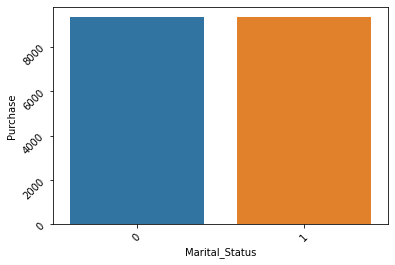

In [37]:
# Criando o gráfico para visualizar qual estado civil mais gastou nesta Black Friday

sns.barplot(x="Marital_Status", y="Purchase", data=df_estd_civil_compr).tick_params(labelrotation=45)

In [38]:
'''
     Aplicando a função "melt" no dataframe completo, tendo a coluna "Marital_Status" como variáveis
     e as colunas "Product_Category_1", "Product_Category_2" e "Product_Category_3" foram setadas como valores
'''

df_por_estado_civil = pd.melt(df_estado_civil, id_vars=["Marital_Status"], 
                                value_vars=["Product_Category_1", "Product_Category_2", 
                                            "Product_Category_3"], var_name="Categories", 
                                value_name="Category_Options").dropna()
df_por_estado_civil

,Marital_Status,Categories,Category_Options
0,0,Product_Category_1,3.0
1,0,Product_Category_1,3.0
2,1,Product_Category_1,3.0
3,0,Product_Category_1,3.0
4,0,Product_Category_1,3.0
...,...,...,...
1612559,0,Product_Category_3,16.0
1612560,1,Product_Category_3,16.0
1612586,0,Product_Category_3,6.0
1612587,0,Product_Category_3,6.0


In [39]:
# Criando um novo dataframe com a quantidade de produtos comprados por categoria por cada estado civil

df_agrup_civil = df_por_estado_civil.groupby(["Marital_Status", "Category_Options"]).count()
df_agrup_civil = df_agrup_civil.reset_index()
df_agrup_civil

,Marital_Status,Category_Options,Categories
0,0,1.0,83230
1,0,2.0,43401
2,0,3.0,14314
3,0,4.0,23823
4,0,5.0,114206
5,0,6.0,24685
6,0,7.0,2369
7,0,8.0,108569
8,0,9.0,10672
9,0,10.0,5300


In [40]:
# Número total de produtos comprados pelo estado civil solteiro

total_categorias_solteiro = df_agrup_civil[df_agrup_civil["Marital_Status"] == 0]["Categories"].sum()
total_categorias_solteiro

636344

In [41]:
# Número total de produtos comprados pelo estado civil casado

total_categorias_casado = df_agrup_civil[df_agrup_civil["Marital_Status"] == 1]["Categories"].sum()
total_categorias_casado

436102

In [42]:
# Criando uma series do percentual de produtos comprados por categoria pelo total de produtos comprados por cada estado civil

percentual_por_categoria = pd.concat([df_agrup_civil[df_agrup_civil["Marital_Status"] == 0]["Categories"] / total_categorias_solteiro,
                                df_agrup_civil[df_agrup_civil["Marital_Status"] == 1]["Categories"] / total_categorias_casado])
percentual_por_categoria

0     0.130794
1     0.068204
2     0.022494
3     0.037437
4     0.179472
5     0.038792
6     0.003723
7     0.170614
8     0.016771
9     0.008329
10    0.037819
11    0.016609
12    0.019185
13    0.067999
14    0.066205
15    0.079399
16    0.027083
17    0.009072
18    0.126399
19    0.065533
20    0.020569
21    0.033958
22    0.175739
23    0.037945
24    0.004389
25    0.181162
26    0.015448
27    0.010138
28    0.035799
29    0.017929
30    0.020605
31    0.069956
32    0.066503
33    0.077785
34    0.029608
35    0.010537
Name: Categories, dtype: float64

In [43]:
# Criando uma coluna no dataframe "df_agrup_civil" com o percentual comprado por categoria por cada estado civil

df_agrup_civil["Percent_by_Category"] = percentual_por_categoria* 100

df_agrup_civil

,Marital_Status,Category_Options,Categories,Percent_by_Category
0,0,1.0,83230,13.079404
1,0,2.0,43401,6.820368
2,0,3.0,14314,2.249412
3,0,4.0,23823,3.743730
4,0,5.0,114206,17.947211
5,0,6.0,24685,3.879191
6,0,7.0,2369,0.372283
7,0,8.0,108569,17.061369
8,0,9.0,10672,1.677080
9,0,10.0,5300,0.832883


De acordo com os dados vistos acima, é possível identificar que há mais clientes solteiros fazendo compras durante a Black Friday, porém o grupo que teve gastos maiores foi o de clientes casados.

Isso ocorre devido à diferença de estilo de vida entre clientes solteiros e casados.

Isto significa que por ter um estilo de vida despreocupado, ou seja, com menos responsabilidades financeiras do que uma pessoa casada, os solteiros podem se dar ao luxo de comprar mais produtos do que uma pessoa casada que precisa levar em consideração os orçamentos familiares, compromissos financeiros, dívidas, etc., antes de comprar realmente alguma coisa. 
Porém ainda que os dados apontem que há mais clientes solteiros, a média dos itens comprados por clientes casados apresenta valores maiores.
Por exemplo, enquanto um solteiro pode comprar 10 produtos variando entre pequenos itens de papelaria e escritório, um cliente casado pode comprar um único produto, como por exemplo um laptop, que ultrapassa o valor total da compra do cliente solteiro.

Analisando mais a fundo o comportamento de compra de cada estado civil por opção de categoria, ao verificar o percentual de gastos, mais especificamente na coluna "Percent_by_Category", podemos ver que o estado civil não influencia realmente na categoria de produto comprada, pois proporcionalmente, a quantidade de produtos comprada por categoria por cada estado civil praticamente se equivale.

In [44]:
# Trazendo a quantidade de produtos da categoria 14 compradas por cada estado civil

df_estado_civil_0 = df_agrup_civil.iloc[13]
df_estado_civil_1 = df_agrup_civil.iloc[31]

df_estado_civil_0, df_estado_civil_1

(Marital_Status             0.000000
 Category_Options          14.000000
 Categories             43271.000000
 Percent_by_Category        6.799938
 Name: 13, dtype: float64,
 Marital_Status             1.000000
 Category_Options          14.000000
 Categories             30508.000000
 Percent_by_Category        6.995611
 Name: 31, dtype: float64)

### Previsão de orçamento publicitário para a Categoria 14 - análise de comportamento do consumidor por estado civil.

A definição de para qual Estado Civil o orçamento publicitário será investido para vender mais produtos da Categoria 14 dependerá exclusivamente da estratégia da empresa.

Os consumidores solteiros já estão organicamente comprando mais produtos desta categoria do que os casados, por isso, se a empresa não quiser se arriscar e garantir que as suas vendas irão disparar, seria lógico investir o orçamento publicitário neste grupo e impulsionar ainda mais as vendas.

No entanto, se a empresa quiser capturar os consumidores casados para mudar seu comportamento de compra nesta categoria de produto, seria uma decisão financeira inteligente utilizar o orçamento publicitário para bombardear propagandas para este grupo e atiçar os consumidores a comprar.
Ainda assim é necessário observar que investir todo o orçamento publicitário nesta estratégia não garantirá que os clientes casados recebendo essas propagandas irão, de fato, comprar produtos desta categoria.

## Questão 13
Quais as variáveis que mais impactaram no valor da compra? Como você chegou a essa conclusão?

Variáveis: Gênero | Idade | Estado civil | Ocupação | Categoria de cidade | Anos vividos na cidade

### **Pré-processamento de dados**

Antes de analisar quais variáveis possuem um maior impacto na quantidade de compras, primeiro é necessário tratar o sinal de "+" em ambas as colunas de "Idade" ("Age") e "Anos vividos na cidade" ("Stay_In_Current_City_Years".

Para isso, o comando *.replace()* será utilizado:

In [45]:
df_vendas_bf["Age"] = df_vendas_bf["Age"].apply(lambda x:str(x).replace('55+', '55'))
df_vendas_bf["Stay_In_Current_City_Years"] = df_vendas_bf["Stay_In_Current_City_Years"].apply(lambda x : str(x).replace('4+', '4'))
df_vendas_bf["Stay_In_Current_City_Years"] = df_vendas_bf["Stay_In_Current_City_Years"].astype('int')

In [46]:
# Verificando as correlações entre variáveis do dataframe completo através da função "corr()"

df_vendas_bf.corr()

,User_ID,Purchase,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,1.000000,0.005389,-0.023024,-0.030655,0.018732,0.003687,0.001471,0.004045
Purchase,0.005389,1.000000,0.021104,0.005470,0.000129,-0.314125,-0.209973,-0.022257
Occupation,-0.023024,0.021104,1.000000,0.031203,0.024691,-0.008114,-0.000031,0.013452
Stay_In_Current_City_Years,-0.030655,0.005470,0.031203,1.000000,-0.012663,-0.004182,-0.001781,0.002039
Marital_Status,0.018732,0.000129,0.024691,-0.012663,1.000000,0.020546,0.015116,0.019452
Product_Category_1,0.003687,-0.314125,-0.008114,-0.004182,0.020546,1.000000,0.540423,0.229490
Product_Category_2,0.001471,-0.209973,-0.000031,-0.001781,0.015116,0.540423,1.000000,0.543544
Product_Category_3,0.004045,-0.022257,0.013452,0.002039,0.019452,0.229490,0.543544,1.000000


### Conforme visto anteriormente na Questão 09:

- O gênero tem uma grande influência nos hábitos de compra.
- O que significa que consumidores "Homens" compram muito mais do que "Mulheres".
- Abaixo temos a amostra de dados para exibir a importância desta variável na previsão de Comportamento do Consumidor.


In [47]:
df_compra_genero = df_vendas_bf.groupby(by=["Gender"])[["Purchase"]].mean()
df_compra_genero = df_compra_genero.reset_index()
df_compra_genero

,Gender,Purchase
0,F,8809.761349
1,M,9504.771713


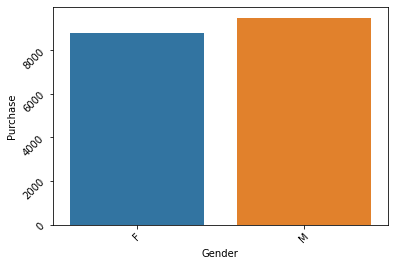

In [48]:
# Trazendo os dados como um gráfico de barras para ser mais fácil avaliar grupo de gênero vs compra

sns.barplot(x=("Gender"), y=("Purchase"), data=df_compra_genero).tick_params(labelrotation=45)

#### Já que o **gênero** tem impacto sobre a quantidade da compra, é preciso determinar se a **idade** também tem um impacto:

In [49]:
df_compra_idade = df_vendas_bf.groupby(by=["Age"])[["Purchase"]].mean()
df_compra_idade = df_compra_idade.reset_index()
df_compra_idade

,Age,Purchase
0,0-17,9020.126878
1,18-25,9235.197575
2,26-35,9314.588970
3,36-45,9401.478758
4,46-50,9284.872277
5,51-55,9620.616620
6,55,9453.898579


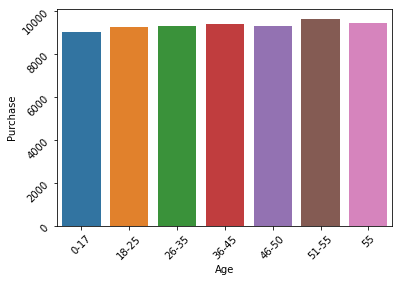

In [50]:
# Trazendo os dados como um gráfico de barras para ser mais fácil avaliar grupo de idade vs compra

sns.barplot(x=("Age"), y=("Purchase"), data=df_compra_idade).tick_params(labelrotation=45)

#### Agora que foi determinado que tanto o **gênero** quanto a **idade** possuem impacto em quanto o consumidor irá gastar, agrupar ambos os dados irá apresentar uma visão mais clara dos hábitos de compra:

In [51]:
compra_genero_idade = df_vendas_bf.loc[:,["Gender", "Age","Purchase"]]

# Pivot Table com Soma de Compra
pv_compra_genero_idade = compra_genero_idade.pivot_table(compra_genero_idade,
                                                            index = ["Gender", "Age"],aggfunc = "mean")

pv_compra_genero_idade

Purchase
Gender Age               
F      0-17   8444.703210
       18-25  8405.430852
       26-35  8791.798654
       36-45  9046.573808
       46-50  8929.448740
       51-55  9131.451837
       55     9119.577196
M      0-17   9312.322227
       18-25  9506.501081
       26-35  9470.621052
       36-45  9517.126321
       46-50  9429.151563
       51-55  9789.020476
       55     9557.058094

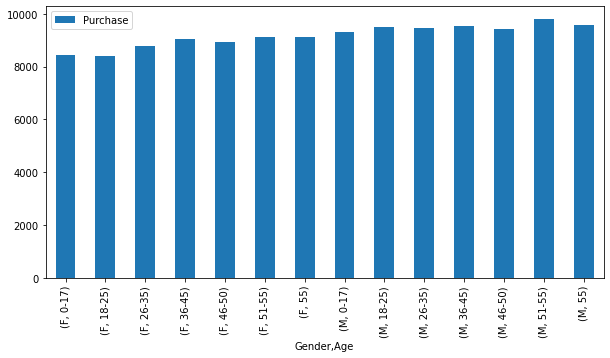

In [78]:
# Trazendo os dados como um gráfico de barras para ser mais fácil avaliar grupo de idade vs gênero vs compra

pv_compra_genero_idade.plot(kind='bar', figsize=(10,5))
plt.show()

Pelo gráfico anterior, é possível observar que a média de compras realizadas por "Mulheres" se mantém muito próxima independente da idade.

Além disso, fica nítido que não somente os consumidores "Homens" gastam mais, eles também representam os maiores gastos ao avaliar os grupos de idade.

Os consumidores homens entre as idades de 51 a 55 anos representam o grupo que compra mais.

#### Após compreender que os hábitos de consumo são influenciados pelo gênero e idade, é preciso determinar se o estado civil também pode representar um grande fator decisivo.

In [53]:
df_estado_civil = df_vendas_bf.groupby(by=["Marital_Status"])[["Purchase"]].mean()
df_estado_civil = df_estado_civil.reset_index()
df_estado_civil

,Marital_Status,Purchase
0,0,9333.325467
1,1,9334.632681


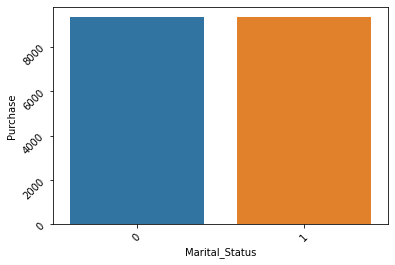

In [54]:
# Trazendo os dados como um gráfico de barras para ser mais fácil avaliar estado civil vs compra

sns.barplot(x=("Marital_Status"), y=("Purchase"), data=df_estado_civil).tick_params(labelrotation=45)

Conforme visto anteriormente, é possível identificar que há mais clientes solteiros fazendo compras durante a Black Friday, porém o grupo que teve gastos maiores foi o de clientes casados.

E a média de gastos entre ambos os estados civis é bastante parecida.

#### Não somente o gênero, idade e estado civil de alguém pode influenciar em seus hábitos de compra, mas a profissão também pode ter um papel importante.
Observando os dados, podemos ter um entendimento mais claro:

In [55]:
df_compra_profissao = df_vendas_bf.groupby(by=["Occupation"])[["Purchase"]].mean()
df_compra_profissao = df_compra_profissao.reset_index()
df_compra_profissao

,Occupation,Purchase
0,0,9186.946726
1,1,9017.703095
2,2,9025.938982
3,3,9238.077277
4,4,9279.026742
5,5,9388.848978
6,6,9336.378620
7,7,9502.175276
8,8,9576.508530
9,9,8714.335934


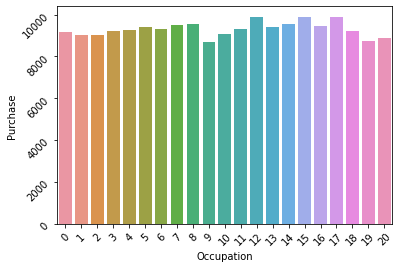

In [56]:
# Trazendo os dados como um gráfico de barras para ser mais fácil avaliar profissão vs compra

sns.barplot(x=("Occupation"), y=("Purchase"), data=df_compra_profissao).tick_params(labelrotation=45)

#### Ao analisar o Comportamento de compra de acordo com a profissão do consumidor, é possível verificar que este dado também tem um impacto, o que significa que aqueles nas ocupações 12, 15 e 17 representam os maiores compradores se comparado às demais profissões.

- Nos dados apresentados abaixo, há uma avalição do comportamento de compra levando em consideração o Gênero, Idade e Ocupação Profissional do consumidor.

In [57]:
habitos_compra = df_vendas_bf.loc[:,["Gender", "Age", "Occupation", "Purchase"]]

# Pivot Table com Soma de Compra
pv_habitos_compra = habitos_compra.pivot_table(habitos_compra,index =(["Gender", "Age", "Occupation"]),aggfunc = "mean")

pv_habitos_compra

Purchase
Gender Age  Occupation              
F      0-17 0            9189.356944
            1            9982.919075
            2            7892.977778
            7            9121.638889
            10           8316.528105
...                              ...
M      55   16           9304.741978
            17           8715.551837
            18           8617.709091
            19           8224.539535
            20          10962.219839

[241 rows x 1 columns]

### A cidade em que a pessoa mora também determina o comportamento do consumidor quando se trata de compras durante a Black Friday.

Como os dados estão mascarados, não é possível determinal cada cidade e nem ter um entendimento se representa uma cidade do interior ou capital.
No entanto, é bastante claro que os consumidores residentes na cidade de categoria C tendem a gastar mais durante a BF.

In [58]:
df_compra_catgcidade = df_vendas_bf.groupby(by=["City_Category"])[["Purchase"]].mean()
df_compra_catgcidade = df_compra_catgcidade.reset_index()
df_compra_catgcidade

,City_Category,Purchase
0,A,8958.011014
1,B,9198.657848
2,C,9844.441855


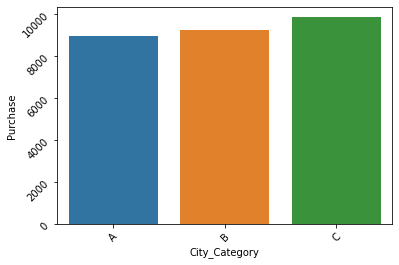

In [59]:
# Trazendo os dados como um gráfico de barras para ser mais fácil avaliar a categoria de cidade vs compra

sns.barplot(x=("City_Category"), y=("Purchase"), data=df_compra_catgcidade).tick_params(labelrotation=45)

### A categoria da cidade tem um impacto no comportamento de compra, por isso é necessário verificar se a quantidade de anos que o consumidor reside naquele cidade também carrega um impacto na compra.

In [60]:
compr_anosvividos_cid = df_vendas_bf.groupby(by=["Stay_In_Current_City_Years"])[["Purchase"]].mean()
compr_anosvividos_cid = compr_anosvividos_cid.reset_index()
compr_anosvividos_cid

,Stay_In_Current_City_Years,Purchase
0,0,9247.238625
1,1,9319.865095
2,2,9397.607316
3,3,9350.685121
4,4,9346.370158


Observando os dados supracitados, é possível compreender que os consumidores que moram há 2 anos em uma cidade estão mais propensos a gastar em compras da Black Friday.

É possível inferir que isso está ligado ao fato de que uma pessoa que reside há dois anos na cidade:
- Está em uma situação mais confortável e estável financeiramente, e/ou
- Definiu aquela cidade como sua moradia de longo prazo;

Dessa forma, podendo fazer ajustes na decoração e/ou mobiliar sua casa e, por isso, as ofertas da Black Friday são uma enorme vantagem.


Com base nos dados, a média de gastos para o período em que o cliente mora na cidade é bem equivalente entre os anos 2 - 4+.

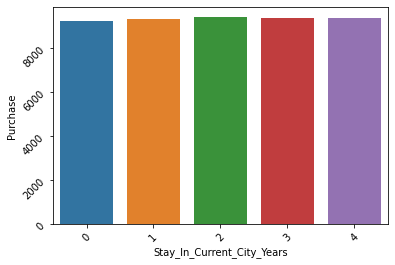

In [77]:
# Trazendo os dados como um gráfico de barras para ser mais fácil avaliar os anos vividos em determinada cidade vs compra
sns.barplot(x=("Stay_In_Current_City_Years"), y=("Purchase"), data=compr_anosvividos_cid).tick_params(labelrotation=45)

#### Analisar a categoria da cidade e os anos vividos nela também pode determinar o comportamento de compra do consumidor, já que não necessariamente uma pessoa residindo por 2 anos na cidade C terá o mesmo hábito de compras que uma pessoa morando há 2 anos nas cidades A & B.

Observando os dados mais afundo, através dessas informações é possível verificar que a cidade de categoria C se mantém como a cidade com clientes que mais gastam e além disso, são também o grupo que mais gasta na análise de tempo de residência.

In [62]:
comp_cidade_categ_estadia = df_vendas_bf.groupby(by=["City_Category", "Stay_In_Current_City_Years"])[["Purchase"]].mean()
comp_cidade_categ_estadia = comp_cidade_categ_estadia.reset_index()
comp_cidade_categ_estadia

,City_Category,Stay_In_Current_City_Years,Purchase
0,A,0,9028.710591
1,A,1,8927.870743
2,A,2,9014.848463
3,A,3,8956.718849
4,A,4,8880.110251
5,B,0,8946.812564
6,B,1,9225.205104
7,B,2,9250.978676
8,B,3,9231.433705
9,B,4,9240.194353


In [63]:
comp_gen_cid = df_vendas_bf.loc[:,["Gender", "City_Category","Purchase"]]

# Pivot Table com Soma de Compra
pv_comp_gen_cid = comp_gen_cid.pivot_table(comp_gen_cid, index = ["Gender", "City_Category"], aggfunc = "mean")

pv_comp_gen_cid

Purchase
Gender City_Category              
F      A               8630.771856
       B               8590.518480
       C               9264.964642
M      A               9061.717739
       B               9400.754481
       C              10033.197730

In [64]:
comp_gen_idad_cid = df_vendas_bf.loc[:,["Gender", "Age", "City_Category","Purchase"]]

# Pivot Table com Soma de Compra
pv_comp_gen_idad_cid = comp_gen_idad_cid.pivot_table(comp_gen_idad_cid,
                                                index = ["Gender", "Age", "City_Category"],aggfunc = "mean")

pv_comp_gen_idad_cid

Purchase
Gender Age   City_Category              
F      0-17  A               7886.698179
             B               8939.330729
             C               8463.347411
       18-25 A               8213.228492
             B               8055.719317
             C               9207.009581
       26-35 A               8738.211626
             B               8616.923493
             C               9190.515763
       36-45 A               8788.829380
             B               8815.413924
             C               9543.087429
       46-50 A               8781.355263
             B               8683.648175
             C               9250.296255
       51-55 A               8765.080849
             B               8926.599713
             C               9534.807443
       55    A               9406.535613
             B               9066.117110
             C               9110.253754
M      0-17  A               9724.054256
             B               9003.989872
             C               9457.613420
       18-25 A               9083.941897
             B               9444.732531
             C              10002.663005
       26-35 A               9068.051243
             B               9375.844004
             C              10163.187717
       36-45 A               9133.318165
             B               9251.536701
             C              10163.306991
       46-50 A               8309.599584
             B               9579.478902
             C               9848.911465
       51-55 A               9909.960710
             B               9541.451520
             C              10052.684942
       55    A               8495.479133
             B              10176.719634
             C               9670.135606

In [65]:
comp_gen_prof_cid = df_vendas_bf.loc[:,["Gender", "Occupation", "City_Category","Purchase"]]

# Pivot Table com Soma de Compra
pv_comp_gen_prof_cid = comp_gen_prof_cid.pivot_table(comp_gen_prof_cid,
                                                   index = ["Gender", "Occupation", "City_Category"],
                                                   aggfunc = "mean")

pv_comp_gen_prof_cid

Purchase
Gender Occupation City_Category             
F      0          A              8951.309242
                  B              8639.637516
                  C              9171.550958
       1          A              8775.600244
                  B              8235.173601
...                                      ...
M      19         B              9121.524590
                  C              8959.955528
       20         A              8586.632863
                  B              9316.301677
                  C              9658.378034

[124 rows x 1 columns]

In [66]:
comp_gen_idad_prof_cid = df_vendas_bf.loc[:,["Gender", "Age", "Occupation", "City_Category","Purchase"]]

# Pivot Table com Soma de Compra
pv_comp_gen_idad_prof_cid = comp_gen_idad_prof_cid .pivot_table(comp_gen_idad_prof_cid , 
                                                                 index = ["Gender", "Age", "Occupation", 
                                                                          "City_Category"], aggfunc = "mean")

pv_comp_gen_idad_prof_cid 

Purchase
Gender Age  Occupation City_Category              
F      0-17 0          A               7601.700000
                       B              10202.267139
                       C               7757.198556
            1          B               9982.919075
            2          A               7458.394737
...                                            ...
M      55   18         C               8617.709091
            19         B               9787.062500
                       C               7775.431138
            20         B              10906.804781
                       C              11076.229508

[588 rows x 1 columns]

In [67]:
analise_compra = df_vendas_bf.loc[:,["Gender", "Age", "Marital_Status", "Occupation", 
                                             "City_Category", "Stay_In_Current_City_Years", "Purchase"]]

# Pivot Table com Soma de Compra
pv_analise_compra  = analise_compra.pivot_table(analise_compra ,index = ["Gender", "Age", "Marital_Status", 
                                                                     "Occupation", "City_Category", 
                                                                     "Stay_In_Current_City_Years"], aggfunc = "mean")

pv_analise_compra  

Purchase
Gender Age  Marital_Status Occupation City_Category Stay_In_Current_City_Years              
F      0-17 0              0          A             2                            7601.700000
                                      B             1                            9878.324538
                                                    3                           12992.590909
                                      C             0                            7797.660714
                                                    1                            7300.016304
...                                                                                      ...
M      55   1              20         B             3                            9165.892216
                                      C             0                           11886.916667
                                                    1                            9843.285714
                                                    2                           11993.142857
                                                    3                           12611.921053

[2430 rows x 1 columns]

Um agradecimento especial ao colega [Gabriela Idalino](https://www.kaggle.com/gabrieloliveirasan), que não faz parte do curso, mas foi essencial no auxílio de entendimento para que a Ana Gabriela Almeida conseguisse gerar todos os gráficos anteriores em um sistema de sub-plots!

Text(0.5, 1.0, 'Anos Vividos na Cidade x Compra')

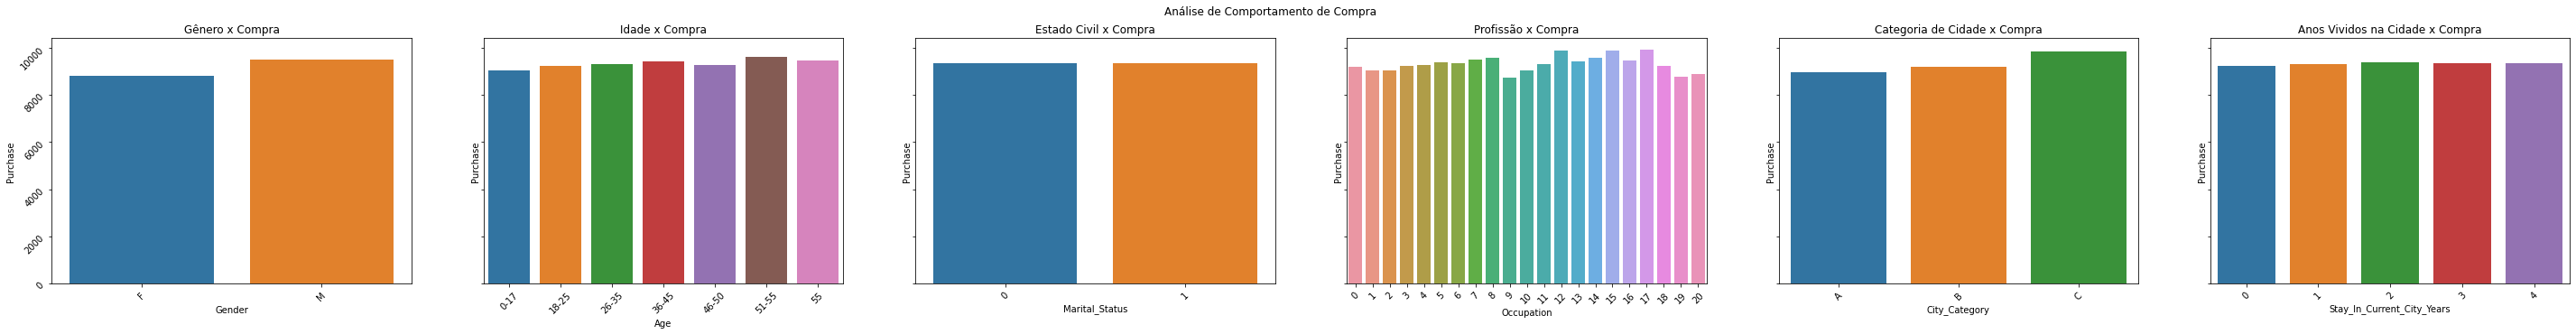

In [76]:
# Gerando todos os gráficos para analisar o comportamento completo do consumidor durante as compras da Black Friday Purchases

fig, axes = plt.subplots(1, 6, figsize=(50, 5), sharey=True)
fig.suptitle("Análise de Comportamento de Compra")


# Gênero
sns.barplot(ax=axes[0], x=("Gender"), y=("Purchase"), data= df_compra_genero).tick_params(labelrotation=45)
axes[0].set_title("Gênero x Compra")


# Idade
sns.barplot(ax=axes[1], x=("Age"), y=("Purchase"), data= df_compra_idade).tick_params(labelrotation=45)
axes[1].set_title("Idade x Compra")

# Estado Civil
sns.barplot(ax=axes[2], x=("Marital_Status"), y=("Purchase"), data= df_estado_civil).tick_params(labelrotation=45)
axes[2].set_title("Estado Civil x Compra")

# Profissão
sns.barplot(ax=axes[3], x=("Occupation"), y=("Purchase"), data= df_compra_profissao).tick_params(labelrotation=45)
axes[3].set_title("Profissão x Compra")

# Categoria de Cidade
sns.barplot(ax=axes[4], x=("City_Category"), y=("Purchase"), data= df_compra_catgcidade).tick_params(labelrotation=45)
axes[4].set_title("Categoria de Cidade x Compra")



# Anos Vividos na Cidade
sns.barplot(ax=axes[5], x=("Stay_In_Current_City_Years"), y=("Purchase"), data= compr_anosvividos_cid).tick_params(labelrotation=45)
axes[5].set_title("Anos Vividos na Cidade x Compra")